# Example use of model_Miko module in pyEEG

Example data:
- eeg_cc - list of ndarrays representing parts of EEG data (each: T x 64)
- speech_cc - list of ndarrays representing parts of speech features used to fit TRFs (each: T x 2)

Below, a few example calls and visualization of results

# Forward models

### Standard approach

Done in 0.364 s


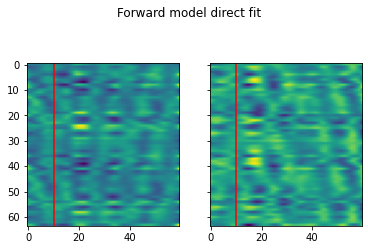

In [5]:
lambdas = np.logspace(-10, 10, 51)

env = np.vstack(speech_cc[:6])
eeg = np.vstack(eeg_cc[:6])

fs = eeg_info['sfreq']

start = time.time()
trf = pyeeg.models_Miko.TRFEstimator(tmin=-0.1, tmax=0.5, srate=fs, alpha=lambdas, fit_intercept=False, mtype='forward')
trf.fit(env, eeg)
print ('Done in {:.3f} s'.format(time.time() - start))

f, ax = plt.subplots(1, 2, sharex=True, sharey=True)

f.suptitle('Forward model direct fit')

ax[0].imshow(trf.get_coef()[:,0,:,25].T)
ax[1].imshow(trf.get_coef()[:,1,:,25].T)

for a in ax:
    a.axvline(10, color='r')

### From cov mats - reshaped input

Clearing saved covariance matrices...
Done in 0.434 s


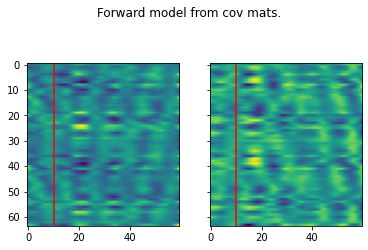

In [6]:
lambdas = np.logspace(-10, 10, 51)

env = np.vstack(speech_cc[:6])
eeg = np.vstack(eeg_cc[:6])

fs = eeg_info['sfreq']

start = time.time()

trf = pyeeg.models_Miko.TRFEstimator(tmin=-0.1, tmax=0.5, srate=fs, alpha=lambdas, fit_intercept=False, mtype='forward')
trf.fit_from_cov(env, eeg, overwrite=True, part_length=150.) # Fit model from cov mats (obtained from 150-sec long segments of data)

print ('Done in {:.3f} s'.format(time.time() - start))

f, ax = plt.subplots(1, 2, sharex=True, sharey=True)

f.suptitle('Forward model from cov mats.')

ax[0].imshow(trf.get_coef()[:,0,:,25].T)
ax[1].imshow(trf.get_coef()[:,1,:,25].T)

for a in ax:
    a.axvline(10, color='r')

### From cov mats - presented as lists

Done in 0.333 s


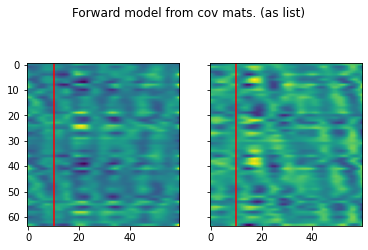

In [7]:
lambdas = np.logspace(-10, 10, 51)

fs = eeg_info['sfreq']

start = time.time()

trf = pyeeg.models_Miko.TRFEstimator(tmin=-0.1, tmax=0.5, srate=fs, alpha=lambdas, fit_intercept=False, mtype='forward')
trf.add_cov(speech_cc[:6], eeg_cc[:6], n_parts=len(speech_cc)) # Compute covariance matrics and add
trf.fit_from_cov() # Fit model from cov mats

print ('Done in {:.3f} s'.format(time.time() - start))

f, ax = plt.subplots(1, 2, sharex=True, sharey=True)

f.suptitle('Forward model from cov mats. (as list)')

ax[0].imshow(trf.get_coef()[:,0,:,25].T)
ax[1].imshow(trf.get_coef()[:,1,:,25].T)

for a in ax:
    a.axvline(10, color='r')

# Backward modelling

### Cross validation - direct fit

In [8]:
lambdas = np.logspace(-10, 10, 51)

env = np.vstack(speech_cc[:6])
eeg = np.vstack(eeg_cc[:6])

fs = eeg_info['sfreq']

trf = pyeeg.models_Miko.TRFEstimator(tmin=-0.5, tmax=0.1, srate=fs, alpha=lambdas, fit_intercept=False, mtype='backward')

tstart = time.time()
ccs_direct = trf.xval_eval(eeg, env, segment_length=30., fit_mode='direct')
print("Done in {:.3f} s".format(time.time() - tstart))

Training/Evaluating fold 1/5
Training/Evaluating fold 2/5
Training/Evaluating fold 3/5
Training/Evaluating fold 4/5
Training/Evaluating fold 5/5
Fitting full model...
Done in 197.191 s


### Cross validation - from_cov fit (150 s chunks)

In [9]:
gc.collect()

lambdas = np.logspace(-10, 10, 51)

env = np.vstack(speech_cc[:6])
eeg = np.vstack(eeg_cc[:6])

fs = eeg_info['sfreq']

trf = pyeeg.models_Miko.TRFEstimator(tmin=-0.5, tmax=0.1, srate=fs, alpha=lambdas, fit_intercept=False, mtype='backward')

tstart = time.time()
ccs_fromcov_150 = trf.xval_eval(eeg, env, segment_length=30., fit_mode='from_cov')
print("Done in {:.3f} s".format(time.time() - tstart))

gc.collect()

Training/Evaluating fold 1/5
Clearing saved covariance matrices...
Training/Evaluating fold 2/5
Clearing saved covariance matrices...
Training/Evaluating fold 3/5
Clearing saved covariance matrices...
Training/Evaluating fold 4/5
Clearing saved covariance matrices...
Training/Evaluating fold 5/5
Clearing saved covariance matrices...
Fitting full model...
Clearing saved covariance matrices...
Done in 183.304 s


0

### Cross validation - from_cov fit (300 s chunks)

In [10]:
gc.collect()

lambdas = np.logspace(-10, 10, 51)

env = np.vstack(speech_cc[:6])
eeg = np.vstack(eeg_cc[:6])

fs = eeg_info['sfreq']

trf = pyeeg.models_Miko.TRFEstimator(tmin=-0.5, tmax=0.1, srate=fs, alpha=lambdas, fit_intercept=False, mtype='backward')

tstart = time.time()
ccs_fromcov_300 = trf.xval_eval(eeg, env, segment_length=30., fit_mode='from_cov_300')
print("Done in {:.3f} s".format(time.time() - tstart))

gc.collect()

Training/Evaluating fold 1/5
Clearing saved covariance matrices...
Training/Evaluating fold 2/5
Clearing saved covariance matrices...
Training/Evaluating fold 3/5
Clearing saved covariance matrices...
Training/Evaluating fold 4/5
Clearing saved covariance matrices...
Training/Evaluating fold 5/5
Clearing saved covariance matrices...
Fitting full model...
Clearing saved covariance matrices...
Done in 206.794 s


0

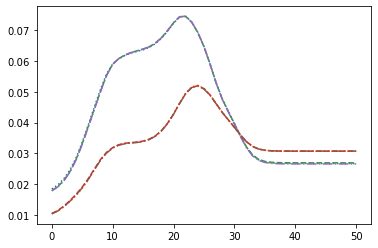

In [13]:
plt.plot(np.mean(ccs_direct[:,:,0,:], axis=(0,1)), ls=':')
plt.plot(np.mean(ccs_direct[:,:,1,:], axis=(0,1)), ls=':')

plt.plot(np.mean(ccs_fromcov_150[:,:,0,:], axis=(0,1)), ls='--')
plt.plot(np.mean(ccs_fromcov_150[:,:,1,:], axis=(0,1)), ls='--')

plt.plot(np.mean(ccs_fromcov_300[:,:,0,:], axis=(0,1)), ls='-.')
plt.plot(np.mean(ccs_fromcov_300[:,:,1,:], axis=(0,1)), ls='-.')